<a href="https://colab.research.google.com/github/nicoloceneda/Python-edu/blob/master/TensorFlow_Custom_Training_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow - Custom Training Basics

---



In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

## Introduction
Training a model typycally involves the following steps:

1. Defining the model
2. Defining the loss function
3. Obtaining the training data
4. Defining the training loop

Here we create a simple linear model `f(X) = x * W + b`, which has two variables: `W` (weights) and `b` (bias). 

## Defining the model
Define a class to encapsulate the **variables** (in the `__init__` method) and **computation** (in the `__call__` method).

In [0]:
class Model:

  def __init__(self):
    self.W = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x):
    return self.W * x + self.b

## Defining the loss function
Define the least square error **loss function** using a `function`.


In [0]:
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

## Obtaining the training data
Sythetise the **training data** by adding random normal noise to the inputs

Current loss: 9.0928


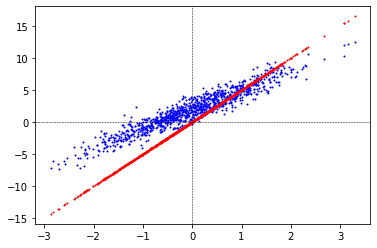

In [0]:
true_w = 3.0
true_b = 2.0
num_examples = 1000

inputs = tf.random.normal(shape=(num_examples, ))
noise = tf.random.normal(shape=(num_examples, ))
outputs = true_b + inputs * true_w + noise

model = Model()
print('Current loss: {:.4f}'.format(loss(model(inputs), outputs).numpy()))

plt.scatter(inputs, outputs, c='b', s=1)
plt.scatter(inputs, model(inputs), c='r', s=1)
plt.axhline(0.0, linestyle='--', linewidth=0.5, color='k')
plt.axvline(0.0, linestyle='--', linewidth=0.5, color='k')
plt.show()

## Defining the training loop
Define the **gradient descent algorithm** using `tf.GradientTape` for automatic differentiation and `tf.assign_sub` for decrementing a value.

In [0]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as tape:
    current_loss = loss(model(inputs), outputs)
  dW, db = tape.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)

**Train the model** running through the training data to learn W and b

Epoch 0: W=5.0000 b=0.0000, current loss=9.0928
Epoch 1: W=4.5878 b=0.4076, current loss=6.0793
Epoch 2: W=4.2609 b=0.7314, current loss=4.1803
Epoch 3: W=4.0017 b=0.9887, current loss=2.9837
Epoch 4: W=3.7961 b=1.1932, current loss=2.2297
Epoch 5: W=3.6331 b=1.3556, current loss=1.7546
Epoch 6: W=3.5038 b=1.4847, current loss=1.4551
Epoch 7: W=3.4013 b=1.5873, current loss=1.2665
Epoch 8: W=3.3200 b=1.6688, current loss=1.1476
Epoch 9: W=3.2555 b=1.7336, current loss=1.0727


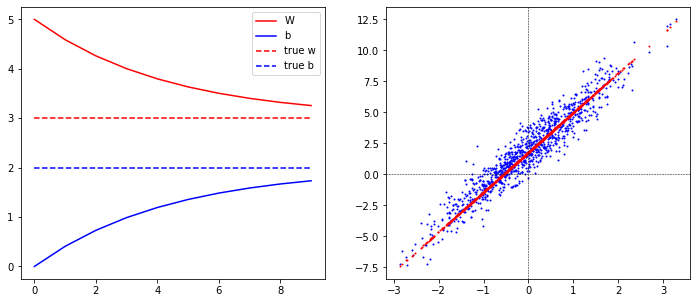

In [0]:
model = Model()

Ws, bs = [], []
epochs = range(10)

for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(inputs), outputs)

  train(model, inputs, outputs, learning_rate=0.1)
  print('Epoch {}: W={:.4f} b={:.4f}, current loss={:.4f}'.format(epoch, Ws[-1], bs[-1], current_loss))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax[0].plot(epochs, Ws, 'r', epochs, bs, 'b')
ax[0].plot([true_w] * len(epochs), 'r--', [true_b] * len(epochs), 'b--')
ax[0].legend(['W', 'b', 'true w', 'true b'])

ax[1].scatter(inputs, outputs, c='b', s=1)
ax[1].scatter(inputs, model(inputs), c='r', s=1)
ax[1].axhline(0.0, linestyle='--', linewidth=0.5, color='k')
ax[1].axvline(0.0, linestyle='--', linewidth=0.5, color='k');